# Titanic Dataset - Exploratory Data Analysis (EDA)



C:\Users\PMYLS\AppData\Local\Temp\ipykernel_20828\902729759.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\PMYLS\AppData\Local\Temp\ipykernel_20828\902729759.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', data=df, ax=ax[0], palette="coolwarm")
C:\Users\PMYLS\AppData\Local\Temp\ipykernel_20828

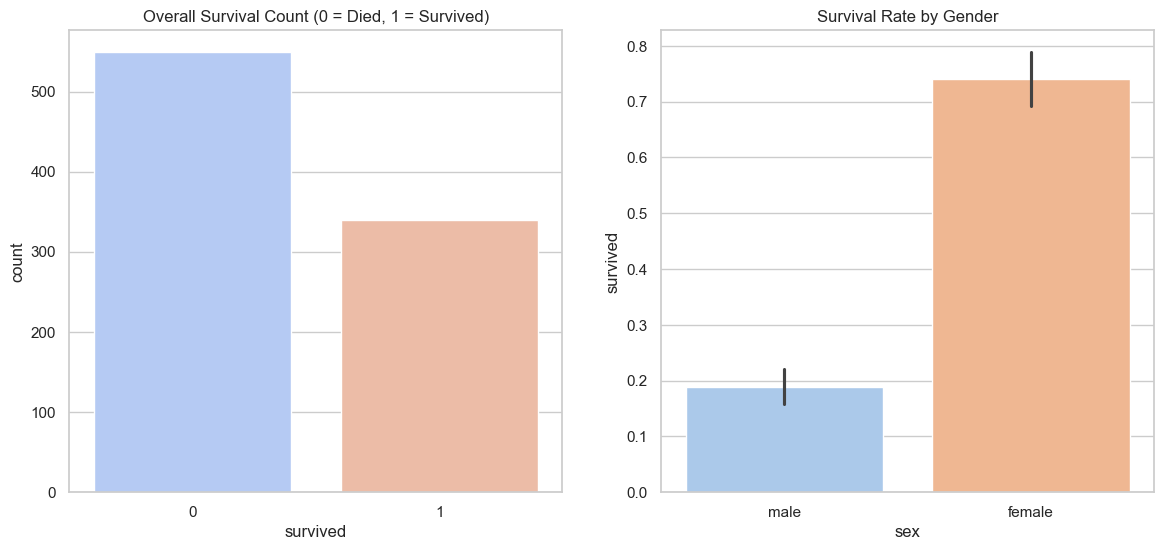

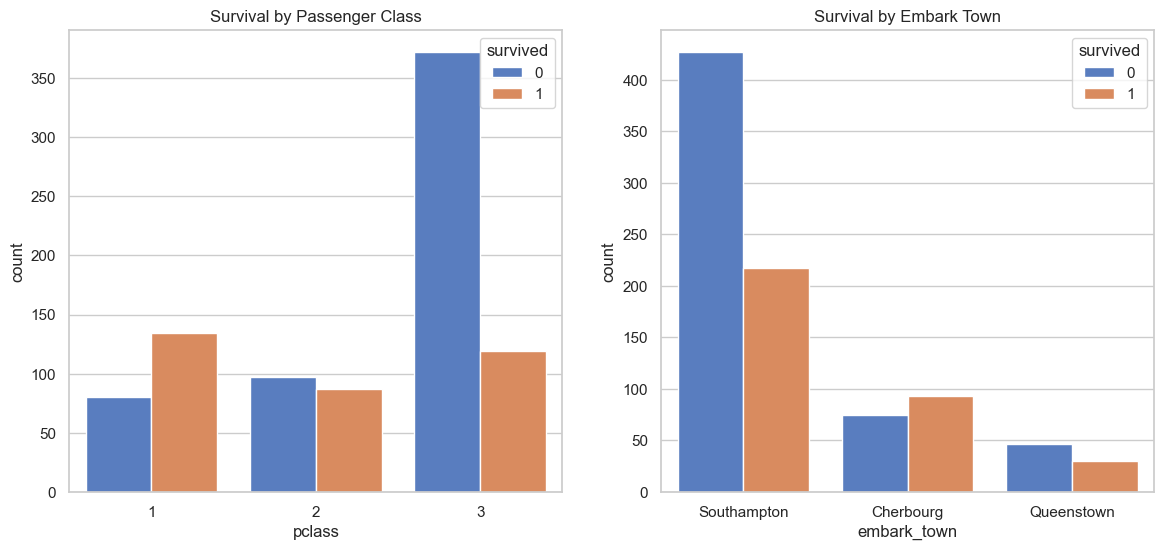

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_20828\902729759.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='survived', y='age', data=df, palette="coolwarm", ax=ax[1])


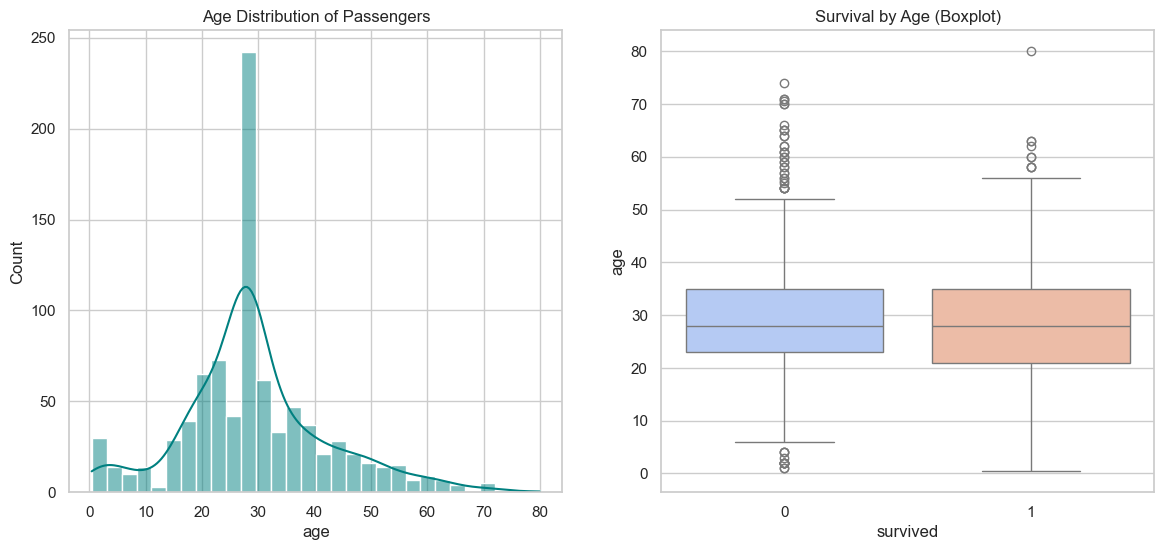

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_20828\902729759.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='survived', y='fare', data=df, palette="coolwarm", ax=ax[1])


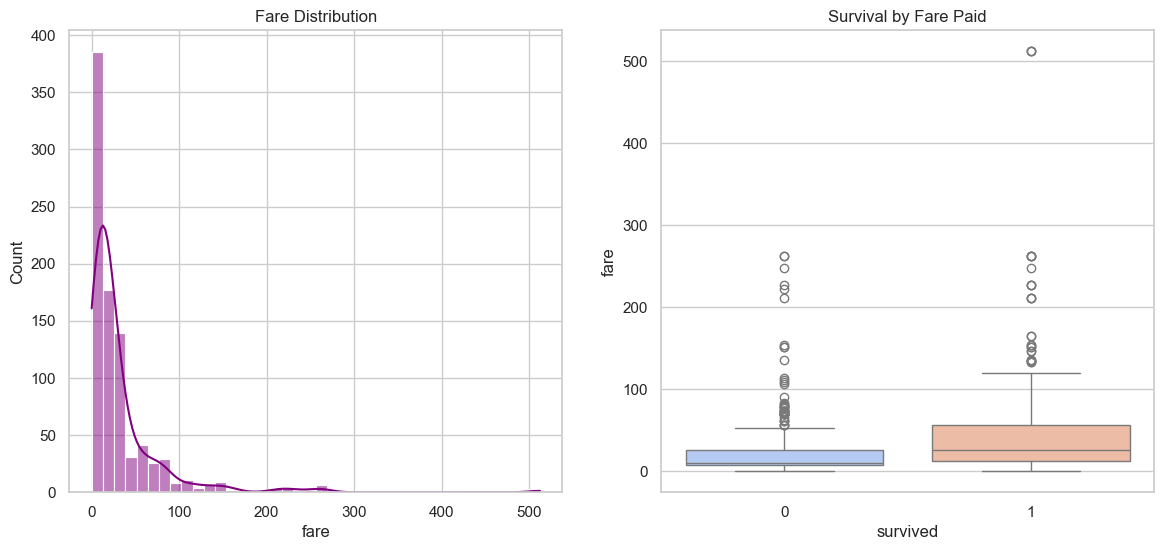

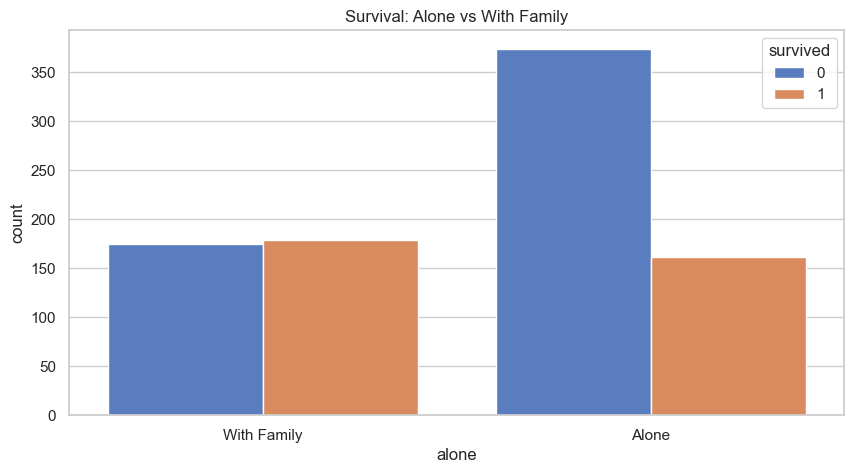

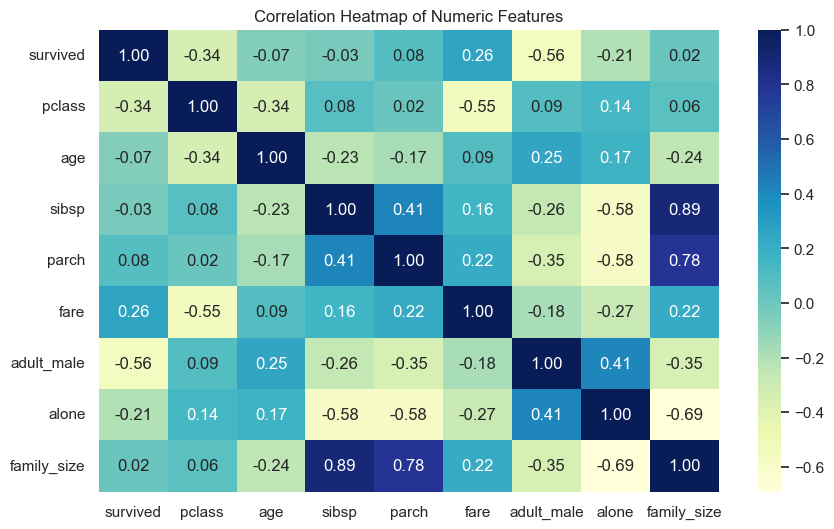

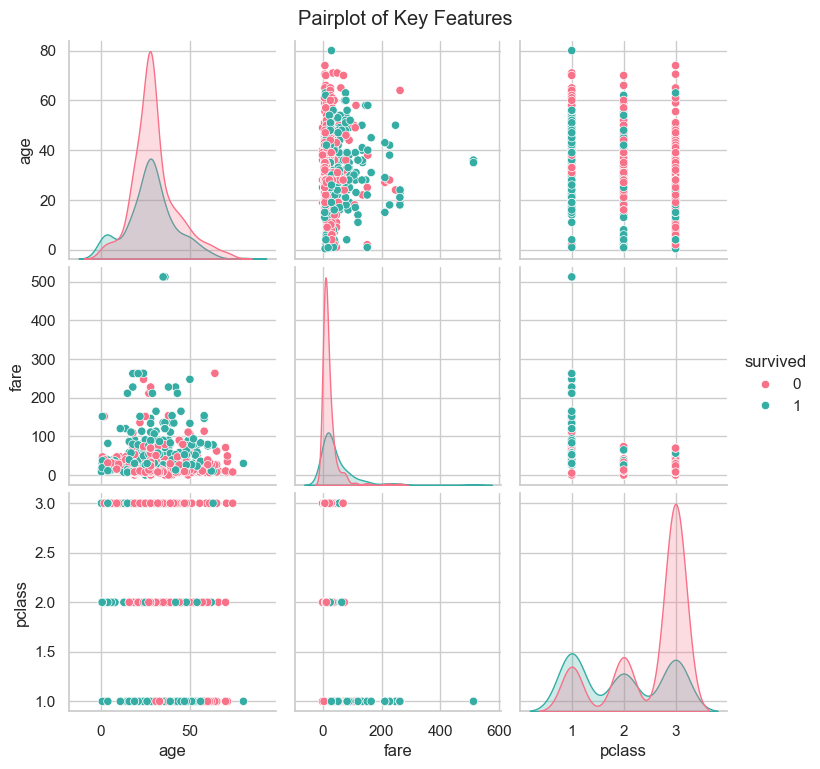


Average Survival by Gender:
sex
female    0.740385
male      0.188908
Name: survived, dtype: float64

Average Survival by Class:
pclass
1    0.626168
2    0.472826
3    0.242363
Name: survived, dtype: float64

Average Survival by Embark Town:
embark_town
Cherbourg      0.553571
Queenstown     0.389610
Southampton    0.336957
Name: survived, dtype: float64


In [1]:
# Titanic Dataset - Complete EDA with Modern Visuals

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Style setup
sns.set_theme(style="whitegrid", palette="Set2")
plt.rcParams["figure.figsize"] = (10,5)

# 1. Load Dataset
df = sns.load_dataset('titanic')

# 2. Handle Missing Values
df.dropna(subset=['embarked', 'embark_town'], inplace=True)
df['age'].fillna(df['age'].median(), inplace=True)

# Add family features
df['family_size'] = df['sibsp'] + df['parch'] + 1
df['alone'] = df['family_size'].apply(lambda x: 1 if x == 1 else 0)

# 3. Survival Distributions
fig, ax = plt.subplots(1,2, figsize=(14,6))
sns.countplot(x='survived', data=df, ax=ax[0], palette="coolwarm")
ax[0].set_title("Overall Survival Count (0 = Died, 1 = Survived)")
sns.barplot(x='sex', y='survived', data=df, ax=ax[1], palette="pastel")
ax[1].set_title("Survival Rate by Gender")
plt.show()

# 4. Class & Embarked
fig, ax = plt.subplots(1,2, figsize=(14,6))
sns.countplot(x='pclass', hue='survived', data=df, palette="muted", ax=ax[0])
ax[0].set_title("Survival by Passenger Class")
sns.countplot(x='embark_town', hue='survived', data=df, palette="muted", ax=ax[1])
ax[1].set_title("Survival by Embark Town")
plt.show()

# 5. Age Distribution
fig, ax = plt.subplots(1,2, figsize=(14,6))
sns.histplot(df['age'], bins=30, kde=True, color="teal", ax=ax[0])
ax[0].set_title("Age Distribution of Passengers")
sns.boxplot(x='survived', y='age', data=df, palette="coolwarm", ax=ax[1])
ax[1].set_title("Survival by Age (Boxplot)")
plt.show()

# 6. Fare Distribution
fig, ax = plt.subplots(1,2, figsize=(14,6))
sns.histplot(df['fare'], bins=40, kde=True, color="purple", ax=ax[0])
ax[0].set_title("Fare Distribution")
sns.boxplot(x='survived', y='fare', data=df, palette="coolwarm", ax=ax[1])
ax[1].set_title("Survival by Fare Paid")
plt.show()

# 7. Family/Alone Feature
sns.countplot(x='alone', hue='survived', data=df, palette="muted")
plt.title("Survival: Alone vs With Family")
plt.xticks([0,1], ["With Family", "Alone"])
plt.show()

# 8. Heatmap (Correlations)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# 9. Pairplot
sns.pairplot(df[['age','fare','pclass','survived']], hue='survived', palette="husl")
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

# 10. Extra Insights
print("\nAverage Survival by Gender:")
print(df.groupby('sex')['survived'].mean())

print("\nAverage Survival by Class:")
print(df.groupby('pclass')['survived'].mean())

print("\nAverage Survival by Embark Town:")
print(df.groupby('embark_town')['survived'].mean())
